<a href="https://colab.research.google.com/github/ArjunMal1311/ML/blob/main/Second_Hand_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [ ]:
# now we are taking years to torque as inputs so these are independent variables and output would
# be price so its depending on the above parameters
# [Ignoring id, road old, road now]

In [ ]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, tf.float32)

tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
tensor_data[0:2]

<tf.Tensor: shape=(2, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05]],
      dtype=float32)>

In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[6.700000e+01, 6.749070e+05, 7.685490e+05, 4.000000e+00,
        9.920700e+04, 4.000000e+00, 2.000000e+00, 1.400000e+01,
        1.600000e+02, 6.400000e+01, 1.000000e+02, 3.251760e+05],
       [3.500000e+02, 6.533700e+05, 8.953140e+05, 7.000000e+00,
        6.791200e+04, 1.000000e+00, 1.000000e+00, 1.200000e+01,
        1.360000e+02, 1.200000e+02, 1.010000e+02, 4.945420e+05],
       [5.280000e+02, 6.168580e+05, 7.771970e+05, 7.000000e+00,
        9.524600e+04, 4.000000e+00, 2.000000e+00, 8.000000e+00,
        1.930000e+02, 7.500000e+01, 8.500000e+01, 3.083765e+05],
       [3.770000e+02, 6.154630e+05, 7.129080e+05, 4.000000e+00,
        5.155400e+04, 5.000000e+00, 5.000000e+00, 9.000000e+00,
        1.480000e+02, 9.600000e+01, 7.000000e+01, 4.607800e+05],
       [2.140000e+02, 6.552670e+05, 8.102660e+05, 6.000000e+00,
        5.890100e+04, 1.000000e+00, 4.000000e+00, 8.000000e+00,
        1.870000e+02, 7.900000e+01, 8.400000e+01, 4

In [ ]:
X = tensor_data[:, 3:-1] # Ignoring first 3 columns and the price column

In [ ]:
X.shape

TensorShape([1000, 8])

In [ ]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[4.0000e+00, 9.9207e+04, 4.0000e+00, 2.0000e+00, 1.4000e+01,
        1.6000e+02, 6.4000e+01, 1.0000e+02],
       [7.0000e+00, 6.7912e+04, 1.0000e+00, 1.0000e+00, 1.2000e+01,
        1.3600e+02, 1.2000e+02, 1.0100e+02],
       [7.0000e+00, 9.5246e+04, 4.0000e+00, 2.0000e+00, 8.0000e+00,
        1.9300e+02, 7.5000e+01, 8.5000e+01],
       [4.0000e+00, 5.1554e+04, 5.0000e+00, 5.0000e+00, 9.0000e+00,
        1.4800e+02, 9.6000e+01, 7.0000e+01],
       [6.0000e+00, 5.8901e+04, 1.0000e+00, 4.0000e+00, 8.0000e+00,
        1.8700e+02, 7.9000e+01, 8.4000e+01]], dtype=float32)>

In [ ]:
y = tensor_data[:, -1]
y.shape

TensorShape([1000])

In [ ]:
# Adding extra dimension
y = tf.expand_dims(y, axis = -1)
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[325176. ],
       [494542. ],
       [308376.5],
       [460780. ],
       [493994. ]], dtype=float32)>

In [ ]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
# normalizer = Normalization(mean = 5, variance = 4)
# x_normalized = tf.constant([[3, 4, 5, 6, 7]])    # ((x-mu)/sigma)
# normalizer(x_normalized)

normalizer = Normalization()
x_normalized = tf.constant([[3, 5, 5, 6, 7],
                            [4, 5, 6, 9, 8]]) # means and SD are gone column wise, mean -> (3+4)/2 --> 3.5 and SD would be 3.5-3 --> 0.5, so overall we get (x-mu)/SD so (4-3.5)/0.5 which is 1

normalizer.adapt(x_normalized)
normalizer(x_normalized)

# Why are we normalizing
# In order to train the data faster


<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1.,  0., -1., -1., -1.],
       [ 1.,  0.,  1.,  1.,  1.]], dtype=float32)>

In [ ]:
# We will normalize the 8 columns of X

normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32650122, -0.03663571,  0.7217797 , -1.2723889 ,  1.0652933 ,
        -0.35754454, -1.0019177 , -0.16262706],
       [ 1.419492  , -1.1107405 , -1.4178833 , -1.6266173 ,  0.16820458,
        -1.6024396 ,  1.7288998 , -0.11511702],
       [ 1.419492  , -0.17258489,  0.7217797 , -1.2723889 , -1.625973  ,
         1.3541863 , -0.46550712, -0.87527764],
       [-0.32650122, -1.6721787 ,  1.4350007 , -0.20970343, -1.1774286 ,
        -0.9799921 ,  0.55854946, -1.5879282 ],
       [ 0.83749425, -1.4200156 , -1.4178833 , -0.56393194, -1.625973  ,
         1.0429624 , -0.2704487 , -0.92278767]], dtype=float32)>

In [ ]:
# LINEAR REGRESSION

# the equation y = mx + c takes on a specific meaning and is used to represent the linear relationship between the independent
# variable x and the dependent variable y within the framework of linear regression

# We need to make the y = mx + c represent mostly of our inputs thus we are expecting a better function
# It should represent best of our data



# Below code is the sequential API
# when layers form a sequence, they are constrcuted in a way one layer is stacked up
# 1 - 2 - 3 ..... - N
# In the form of sequence

# We have a dense layer at the end and we need to ensure that the data that we pass to dense layer is normalized
# like we have input horse power we input the horse power (x), multiply it by m and then add c
# m is weight and c is bias

# output is y (predicted)

# Similarly in this modal we have 8 layers, we pass them to dense layer
# for each input we have m1, m2 .... m8 weights -> m1x1 + m2x2 + ...... +m8x8 + c, this thing goes to dense layer
# so total parameters are 9 so in the below code output you can see trainable params as 9

# Non trainable params come from normalization layer (17)

# Overview

# Data -> Normalized -> Dense Layer -> Output

# Dense(1), 1 output we want, if we want to predict 2 prices then Dense(2)

In [ ]:
model = tf.keras.Sequential([InputLayer(input_shape = (8)) ,normalizer,

                             Dense(32, activation = "relu"), # Hidden layer (read below)
                             Dense(32, activation = "relu"), # Hidden layer (read below)
                             Dense(32, activation = "relu"), # Hidden layer (read below)

                             Dense(1)]) # output having one neuron             # We are generally not passing 1000 inputs, we just pass around 32 inputs, not done in this!

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 32)                288       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2450 (9.57 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

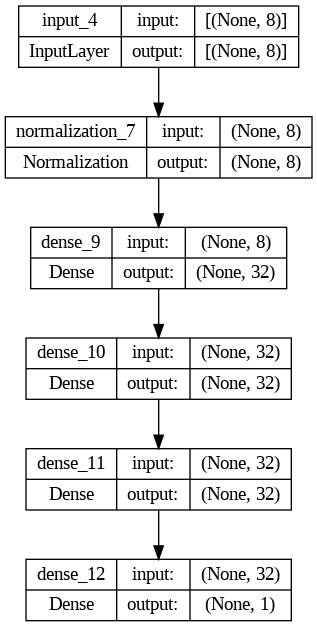

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True)

In [ ]:
# We now have build model y = mx + c
# now we have line now when we put x we will get y
# we need to compare the output which model gives and actual output
# we need to minimize the error

# so every time error occurs, we sanction the error

# (actual output - y predicted)^2, if same then we get 0 then zero sanction
# (2-4)^2 -> 4 (we amplify the error)

# Overall error Calculation
# we use Mean square error function

# Refer Image 2-Modal

In [ ]:
# Usage Reference
y_true = [[0.0, 1.0], [0.0, 0.0]]
y_pred = [[1.0, 1.0], [1.0, 0.0]]

mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()    # (0-1)^2 -> 1, (1-1)^2 -> 0, (0-1)^2 -> 1, (0-0)^2 -> 0, so overall we get (1+0+1+0)/4, 4 is total elements, and we get 0.5

0.5

In [ ]:
# For regression, we can also use MeanAbsoluteError
# loss = abc(y_true - y_pred)

# we need to understand when to use either method

# in mean absolute error the error mainly comes when we have outlier
# the problem is we will get very large error and thus this error can be prevented by using meanabsoluteerror
# which uses the absolute value rather than square



# Loss function Yuba Loss allows us to use both methods in intelligent manner
# loss = 0.5*x^2                    if |y_true - y_pred| <=d
# loss = 0.5*d^2 + d*(|x| - d)      if |y_true - y_pred| > d

# d is threashold which decides whether the data point is outlier or not

In [ ]:
# model.compile(loss = Huber(delta = 1))

model.compile(loss = MeanSquaredError())

In [ ]:
# We want to now obtain the value of m and c
# Commonly used today is stochastic gradient descent [SGD]

# W = Wp - (LR)(dL/dWp)    # Wp - Initialized Weight, LR is Learning Rate, (dL/dWp) -> Rate the loss changes wrt to that weight

# y = mx + c
# we ll assign weights (m) randomly so m = 0 anc c = 2 (say)

# new m = 0 - 0.1*(dL/dm)
# new c = 2 - 0.1*(dL/dc)

# |Ya - (mx+c)| --> New Error


In [ ]:
model.fit(X, y, epochs = 100, verbose = 1) # epochs is the number of times we gonna update the weights, verbose deals with output of our training set

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 111062441984.0000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 111059787776.0000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 111054209024.0000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 111043960832.0000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 111027290112.0000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 111002009600.0000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 110965678080.0000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 110914338816.0000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 110846812160.0000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 110757527552.0000
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 110644707328.00

In [ ]:
model.compile(optimizer = Adam(learning_rate = 1), loss = MeanAbsoluteError(), metrics = RootMeanSquaredError())  # metrics used for performance measure

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_val, y_val), epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 100380.1562 - root_mean_squared_error: 132196.1719 - val_loss: 88716.8906 - val_root_mean_squared_error: 102012.1172
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 73648.4766 - root_mean_squared_error: 90614.8047 - val_loss: 49143.8789 - val_root_mean_squared_error: 60809.4883
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 55049.4102 - root_mean_squared_error: 69004.5703 - val_loss: 50196.5664 - val_root_mean_squared_error: 62686.1328
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 49073.5586 - root_mean_squared_error: 60389.4258 - val_loss: 56080.1094 - val_root_mean_squared_error: 71681.9141
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 45029.3945 - root_mean_squared_error: 55174.4180 - val_loss: 43478.0000 - val_root_mean_squared_error: 51297.5898
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

In [ ]:
history.history

{'loss': [100380.15625,
  73648.4765625,
  55049.41015625,
  49073.55859375,
  45029.39453125,
  42924.8984375,
  44806.44140625,
  50627.8046875,
  57780.60546875,
  41145.95703125,
  43392.4296875,
  40448.48828125,
  43304.2890625,
  53220.78125,
  53578.12109375,
  51596.55859375,
  40577.08203125,
  44381.46875,
  44661.3046875,
  41196.14453125,
  41054.4921875,
  45552.28515625,
  45066.10546875,
  41459.93359375,
  41125.81640625,
  43756.8515625,
  49342.1796875,
  39714.5,
  37006.70703125,
  40151.40625,
  39672.875,
  36178.71484375,
  36983.765625,
  38766.02734375,
  38014.953125,
  38381.29296875,
  35949.80078125,
  39015.25,
  38794.11328125,
  36507.265625,
  35661.50390625,
  40175.17578125,
  37877.453125,
  37166.54296875,
  35508.49609375,
  41792.01953125,
  41495.08203125,
  38050.67578125,
  36510.37890625,
  39947.83984375,
  35766.3984375,
  38992.48046875,
  36933.390625,
  35489.16015625,
  37467.34375,
  36797.0859375,
  37519.3359375,
  44216.01953125,
  

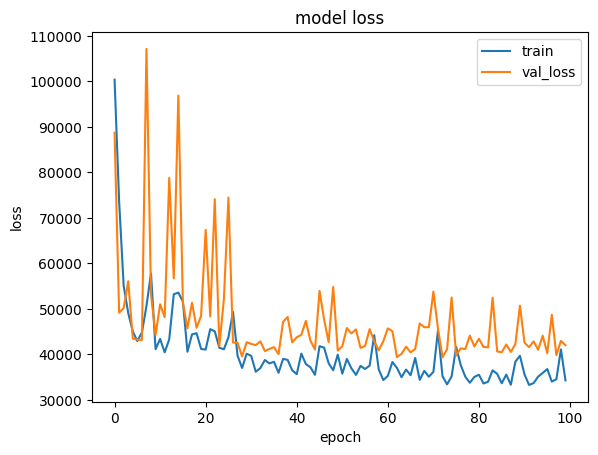

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [ ]:
# We should divide our data between training and testing
# like if small dataset then we should divide it in 70 : 30 and if big then 90 : 10

# Also famous division is 80 : 20

# We should ensure that model performs well on the data it is trained on!
# We firstly shuffle our data set and validate our data
# So now we also include validation set

# 1000 data entries are divided into 800 training, 100 validation and 100 testing --> 8 : 1 : 1


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]

print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [ ]:
# Using Tensorflow DATA API

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE) # prefetch allows later elements to be prepared while current elements are being processed

# buffersize is used for shuffling
# When you call train_dataset.shuffle(buffer_size=8), TensorFlow will load the first 8 elements from train_dataset into a buffer.
# It will then randomly select one element from the buffer and add it to the shuffled dataset. This process is repeated until the buffer is empty.

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO))]

print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]

print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32518542, -0.06386562,  0.7147065 , -1.2572773 ,  1.0883944 ,
        -0.35966212, -1.0071856 , -0.13561688],
       [ 1.4246902 , -1.1543757 , -1.4240658 , -1.6114398 ,  0.18982375,
        -1.6127013 ,  1.7881238 , -0.0879484 ],
       [ 1.4246902 , -0.2018912 ,  0.7147065 , -1.2572773 , -1.6073176 ,
         1.3632668 , -0.45810696, -0.85064405],
       [-0.32518542, -1.7243888 ,  1.4276305 , -0.19478934, -1.1580322 ,
        -0.98618174,  0.5901341 , -1.5656712 ],
       [ 0.8413983 , -1.4683743 , -1.4240658 , -0.548952  , -1.6073176 ,
         1.050007  , -0.25844198, -0.8983125 ]], dtype=float32)>

In [ ]:
# Performance Measurement

model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 34089.9648 - root_mean_squared_error: 42186.7031


[34089.96484375, 42186.703125]

In [ ]:
# We have trained our model!

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


array([[365430.6  ],
       [381537.3  ],
       [320404.72 ],
       [241750.1  ],
       [211128.11 ],
       [129154.69 ],
       [198237.06 ],
       [141655.3  ],
       [313356.   ],
       [200166.11 ],
       [202757.73 ],
       [ 98497.52 ],
       [339891.78 ],
       [179744.56 ],
       [419152.16 ],
       [464376.03 ],
       [417825.38 ],
       [104697.586],
       [342007.75 ],
       [176072.64 ],
       [333684.8  ],
       [241586.02 ],
       [254001.08 ],
       [481052.47 ],
       [316430.22 ],
       [211125.86 ],
       [123686.91 ],
       [431606.97 ],
       [330813.28 ],
       [161898.11 ],
       [166148.72 ],
       [323393.25 ],
       [158823.53 ],
       [340623.94 ],
       [468473.75 ],
       [204777.2  ],
       [511633.34 ],
       [329478.34 ],
       [235341.39 ],
       [488412.1  ],
       [148442.14 ],
       [418082.47 ],
       [292507.97 ],
       [ 82269.55 ],
       [173331.75 ],
       [190804.38 ],
       [435829.94 ],
       [32474

In [ ]:
model.predict(X_test[0])

1/1 [==============================] - 0s 74ms/step


array([[365430.6]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([413424.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:, 0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:, 0])
y_pred

4/4 [==============================] - 0s 3ms/step


[365430.6,
 381537.3,
 320404.72,
 241750.1,
 211128.11,
 129154.69,
 198237.06,
 141655.3,
 313356.0,
 200166.11,
 202757.73,
 98497.52,
 339891.78,
 179744.56,
 419152.16,
 464376.03,
 417825.38,
 104697.586,
 342007.75,
 176072.64,
 333684.8,
 241586.02,
 254001.08,
 481052.47,
 316430.22,
 211125.86,
 123686.91,
 431606.97,
 330813.28,
 161898.11,
 166148.72,
 323393.25,
 158823.53,
 340623.94,
 468473.75,
 204777.2,
 511633.34,
 329478.34,
 235341.39,
 488412.1,
 148442.14,
 418082.47,
 292507.97,
 82269.55,
 173331.75,
 190804.38,
 435829.94,
 324749.0,
 253794.34,
 254942.55,
 325419.4,
 432582.03,
 189776.33,
 478926.1,
 547665.9,
 564906.8,
 309345.12,
 524726.2,
 142850.14,
 455608.5,
 237360.25,
 417104.25,
 140520.88,
 523093.2,
 481603.56,
 466123.9,
 222761.52,
 272928.28,
 478579.16,
 152678.61,
 461349.28,
 129918.5,
 533901.8,
 304765.25,
 473105.6,
 356177.4,
 193144.95,
 466866.5,
 152281.98,
 505157.25,
 345790.12,
 371604.16,
 420870.16,
 457470.66,
 84907.5,
 1737

Text(0, 0.5, 'Car Price Prices')

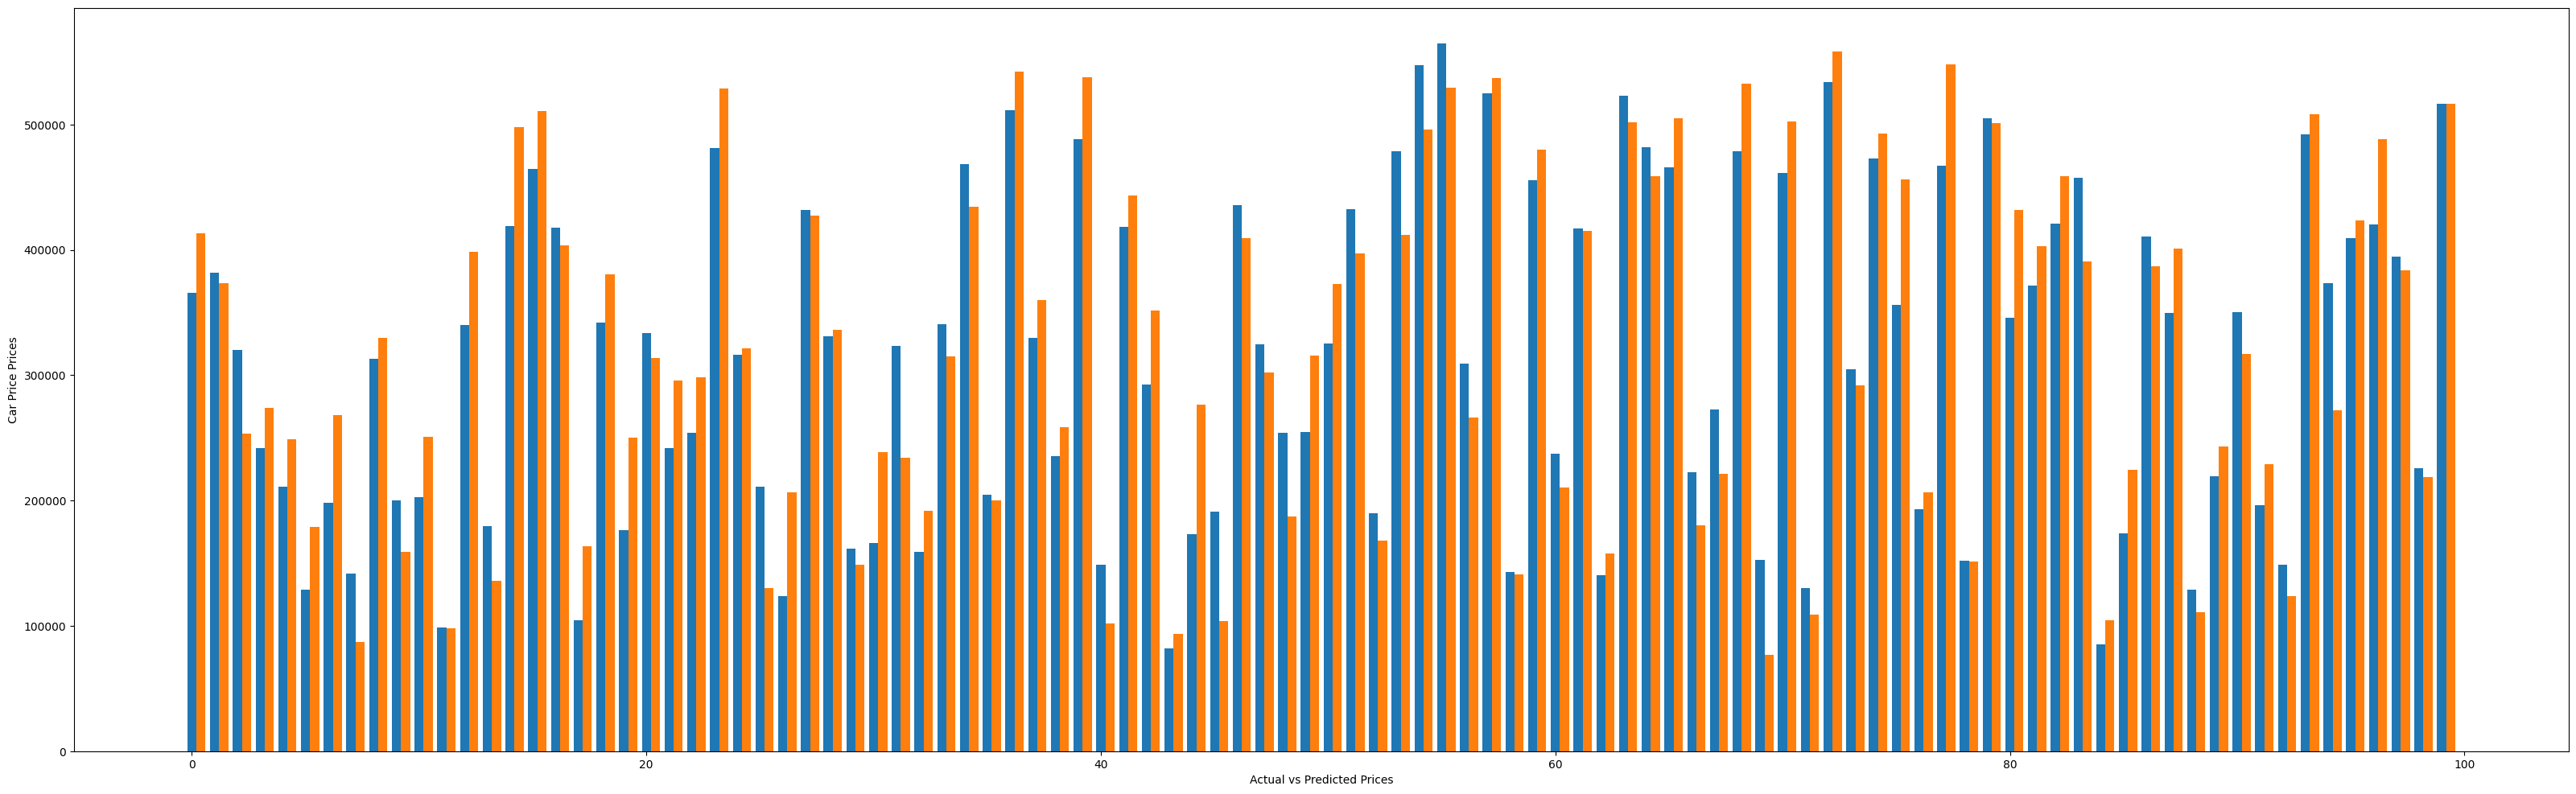

In [ ]:
import numpy as np
ind = np.arange(100)
plt.figure(figsize = (40, 12))

width = 0.4

plt.bar(ind, y_pred, width, label = "Predicted Car Price")
plt.bar(ind + width, y_true, width, label = "Actual Car Price")

plt.xlabel("Actual vs Predicted Prices")
plt.ylabel("Car Price Prices")   # Blue is predicted and orange is actual

In [ ]:
# Model is performing very poorly

# validation loss should be above the training loss but in some cases
# If training loss is above validation loss then we call it underfeeding

# Our aim is to reduce the error

# Improving Technique
# Hidden layers are the layers of neurons between the input and output layers in a neural network. They are called
# "hidden" because their outputs are not directly observed or used in the final prediction; instead, they play a crucial role in learning and extracting features from the input data.

# Inputs -> Multiple Hidden Layers to improve prediction -> Dense Layer
# We need to mention the activation function since we put non-linear functions which add even more complexity to the model
# common activation functions - Sigmoid, relu, tensh, rectified linear unit and leaky relu

# Each hidden layer in a neural network can have its own activation function. In fact, it's a common practice to use
# different activation functions for different layers based on the nature of the problem you're trying to solve and the characteristics of the data.

